In [258]:
#Import libraries
import pandas as pd
import numpy as np
import chardet
import datetime

#Import the plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(16,10)})

from datetime import timedelta

In [4]:
#inspect the loan.csv file for encoding format
with open("loan.csv","rb") as rawdata:
    encformat = chardet.detect(rawdata.read())

print(encformat)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [7]:
#Read the loan.csv and check the first five rows
#Use utf-8 as encoding format to read the file
loan = pd.read_csv("loan.csv",encoding='utf-8',low_memory=False)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [8]:
#Setting max col display to 500
pd.set_option('display.max_columns', 500)

In [12]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [11]:
loan.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## Note: FICO scores are not in the loan.csv file as indicated in the data dictionary

In [16]:
# Checking for null value columns
loan.isnull().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

In [34]:
#getting detailed list of all null value columns
for col in loan:
    print((loan[[col]].isnull().sum()))

id    0
dtype: int64
member_id    0
dtype: int64
loan_amnt    0
dtype: int64
funded_amnt    0
dtype: int64
funded_amnt_inv    0
dtype: int64
term    0
dtype: int64
int_rate    0
dtype: int64
installment    0
dtype: int64
grade    0
dtype: int64
sub_grade    0
dtype: int64
emp_title    2459
dtype: int64
emp_length    1075
dtype: int64
home_ownership    0
dtype: int64
annual_inc    0
dtype: int64
verification_status    0
dtype: int64
issue_d    0
dtype: int64
loan_status    0
dtype: int64
pymnt_plan    0
dtype: int64
url    0
dtype: int64
desc    12940
dtype: int64
purpose    0
dtype: int64
title    11
dtype: int64
zip_code    0
dtype: int64
addr_state    0
dtype: int64
dti    0
dtype: int64
delinq_2yrs    0
dtype: int64
earliest_cr_line    0
dtype: int64
inq_last_6mths    0
dtype: int64
mths_since_last_delinq    25682
dtype: int64
mths_since_last_record    36931
dtype: int64
open_acc    0
dtype: int64
pub_rec    0
dtype: int64
revol_bal    0
dtype: int64
revol_util    50
dtype: int64
to

In [35]:
# There are many columns with only null values. 
#Dropping columns that have all values as null
loan2 = loan.dropna(axis=1, how="all")

In [36]:
loan2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

### Univariate Analysis

#### Modify columns to create numerical value columns

In [39]:
loan2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [49]:
loan2.term.value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [46]:

loan2.term.apply(lambda x: (str(x).split(" "))[1])

0        36
1        60
2        36
3        36
4        60
         ..
39712    36
39713    36
39714    36
39715    36
39716    36
Name: term, Length: 39717, dtype: object

In [52]:
loan2['term_months'] = loan2.term.apply(lambda x: int((str(x).split(" "))[1]))

<ipython-input-52-25f8f2cf7e56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan2['term_months'] = loan2.term.apply(lambda x: int((str(x).split(" "))[1]))


In [61]:
loan2['int_rate_decimal'] = loan2.int_rate.apply(lambda x: float ((str(x).split("%"))[0]))

<ipython-input-61-09d0fff06334>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan2['int_rate_decimal'] = loan2.int_rate.apply(lambda x: float ((str(x).split("%"))[0]))


In [64]:
loan2.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [65]:
loan2.issue_d.value_counts()

Dec-11    2260
Nov-11    2223
Oct-11    2114
Sep-11    2063
Aug-11    1928
Jul-11    1870
Jun-11    1827
May-11    1689
Apr-11    1562
Mar-11    1443
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
Aug-08      71
May-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: issue_d, dtype: int64

In [90]:
loan2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [83]:
#creating columns for issue month and issue year
loan2.issue_d.apply( lambda x: int(datetime.datetime.strptime(x,'%b-%y').strftime('%m')))

0        12
1        12
2        12
3        12
4        12
         ..
39712     7
39713     7
39714     7
39715     7
39716     6
Name: issue_d, Length: 39717, dtype: int64

In [84]:
loan2['issue_month'] = loan2.issue_d.apply( lambda x: int(datetime.datetime.strptime(x,'%b-%y').strftime('%m')))

<ipython-input-84-bdcdcd2f074b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan2['issue_month'] = loan2.issue_d.apply( lambda x: int(datetime.datetime.strptime(x,'%b-%y').strftime('%m')))


In [81]:
loan2.issue_d.apply( lambda x: int(datetime.datetime.strptime(x,'%b-%y').strftime('%Y')))

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
39712    2007
39713    2007
39714    2007
39715    2007
39716    2007
Name: issue_d, Length: 39717, dtype: int64

In [82]:
loan2['issue_year'] = loan2.issue_d.apply( lambda x: int(datetime.datetime.strptime(x,'%b-%y').strftime('%Y')))

<ipython-input-82-3239cf3fc71c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan2['issue_year'] = loan2.issue_d.apply( lambda x: int(datetime.datetime.strptime(x,'%b-%y').strftime('%Y')))


In [88]:
#Derive the quarter of loan issue and assign it to a new column
loan2['issue_month'].apply(lambda x: x//3 if x%3 == 0 else (x//3 + 1))

0        4
1        4
2        4
3        4
4        4
        ..
39712    3
39713    3
39714    3
39715    3
39716    2
Name: issue_month, Length: 39717, dtype: int64

In [89]:
loan2['issue_quarter'] = loan2['issue_month'].apply(lambda x: x//3 if x%3 == 0 else (x//3 + 1))

<ipython-input-89-dd04baedbed6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan2['issue_quarter'] = loan2['issue_month'].apply(lambda x: x//3 if x%3 == 0 else (x//3 + 1))


In [91]:
loan2.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [94]:
#Filter out rows with loan_status == 'Current'. These are active loans
#Only consider successfully paid off loans and defaulters for analysis
loan2 = loan2[~(loan2['loan_status'] == 'Current')]

In [95]:
loan2.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [96]:
#Create boolean value column for loan status
#True (or 1) indicates loan was piad off. 
#False (or 0) indiactes loan was defaulted
loan2.loan_status.apply(lambda x: True if x == 'Fully Paid' else False)

0         True
1        False
2         True
3         True
5         True
         ...  
39712     True
39713     True
39714     True
39715     True
39716     True
Name: loan_status, Length: 38577, dtype: bool

In [97]:
loan2['loan_status_bool'] = loan2.loan_status.apply(lambda x: True if x == 'Fully Paid' else False)

In [98]:
loan2.loan_status_bool.sum()

32950

In [100]:
loan2.out_prncp.value_counts()

0.0    38577
Name: out_prncp, dtype: int64

In [101]:
loan2.out_prncp_inv.value_counts()

0.0    38577
Name: out_prncp_inv, dtype: int64

In [102]:
# Drop out_prncp and out_prncp cols, as these are applicable to active loans
# For paid off and defaulting loans these will be zeros
loan2.drop(columns='out_prncp',inplace=True)
loan2.drop(columns='out_prncp_inv',inplace=True)

In [104]:
loan2.shape

(38577, 61)

In [105]:
loan2.next_pymnt_d.value_counts()

Series([], Name: next_pymnt_d, dtype: int64)

In [106]:
#Drop next_pymnt_d column, if this ONLY applicable to active loans
loan2.drop(columns='next_pymnt_d',inplace=True)

In [107]:
loan2.shape

(38577, 60)

In [192]:
#Capturing the month and year of earliest credit line
loan2['cr_line_month'] = loan2.earliest_cr_line.apply(lambda x: (str(x).split("-"))[0])

In [201]:
#Converting cr_line_month to a number 1-12
loan2['cr_line_month'] = loan2.cr_line_month.apply(lambda x: int( (datetime.datetime.strptime(x,'%b').strftime('%m'))))

In [197]:
#Capturing the month and year of earliest credit line
loan2['cr_line_year'] = loan2.earliest_cr_line.apply(lambda x: ((str(x).split("-"))[1]))

In [199]:
#Y2K fix for cr_line_year
loan2['cr_line_year'] = loan2.cr_line_year.apply(lambda x: int("20" + str(x)) if x <= '21' else int("19" + str(x)))

In [214]:
#Create python date concatenation function
def string_date (year,month):
    return(datetime.date(year,month,1))


In [218]:
#Convert earliest_cr_line into date

loan2['earliest_cr_date'] = loan2[['cr_line_year','cr_line_month']].apply(lambda x: string_date(*x),axis=1)

### Avg. Credit Age = (Oldest credit account date - Today's date)/Total number of open accounts
### If a person has been opening a lot of credit cards or accounts lately, this number will drop

In [220]:
#Calculate credit age as difference between current date and earliest credit account date
loan2.earliest_cr_date.apply(lambda x: datetime.date.today() - x)

0       13371 days
1        8168 days
2        7223 days
3        9323 days
5        6127 days
           ...    
39712   11241 days
39713   12672 days
39714    8350 days
39715   11971 days
39716    6524 days
Name: earliest_cr_date, Length: 38577, dtype: timedelta64[ns]

In [221]:
loan2['credit_age'] = loan2.earliest_cr_date.apply(lambda x: datetime.date.today() - x)

In [222]:
#Create a new col with average credit age
loan2['avg_credit_age'] = loan2['credit_age']/loan2['open_acc']

In [223]:
#Modify timedelta to number of days
loan2['avg_credit_age'] = loan2.avg_credit_age.apply(lambda x: x.days)

In [225]:
loan2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 65 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   id                          38577 non-null  int64          
 1   member_id                   38577 non-null  int64          
 2   loan_amnt                   38577 non-null  int64          
 3   funded_amnt                 38577 non-null  int64          
 4   funded_amnt_inv             38577 non-null  float64        
 5   term                        38577 non-null  object         
 6   int_rate                    38577 non-null  object         
 7   installment                 38577 non-null  float64        
 8   grade                       38577 non-null  object         
 9   sub_grade                   38577 non-null  object         
 10  emp_title                   36191 non-null  object         
 11  emp_length                  37544 non-nul

# Bi-variate Analysis 
### Analysis of multiple cols, compared with key parameter of loan status and loan amount

In [226]:
loan2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,term_months,int_rate_decimal,issue_month,issue_year,issue_quarter,loan_status_bool,earliest_cr_date,credit_age,avg_credit_age,cr_line_month,cr_line_year
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36,10.65,12,2011,4,True,1985-01-01,13371 days,4457,1,1985
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,60,15.27,12,2011,4,False,1999-04-01,8168 days,2722,4,1999
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36,15.96,12,2011,4,True,2001-11-01,7223 days,3611,11,2001
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36,13.49,12,2011,4,True,1996-02-01,9323 days,932,2,1996
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,NaN,NaN,9,0,7963,28.30%,12,f,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36,7.90,12,2011,4,True,2004-11-01,6127 days,680,11,2004


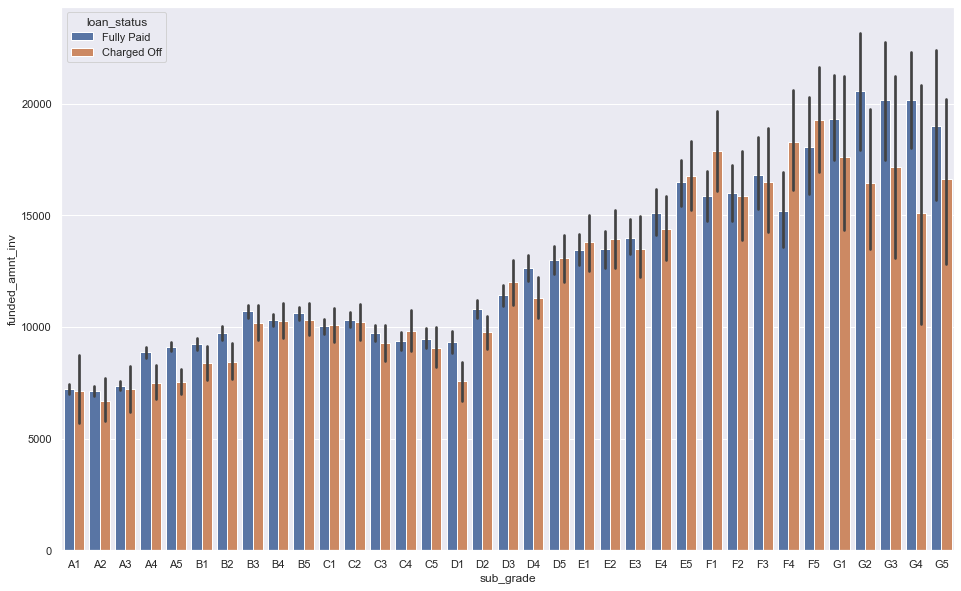

In [227]:
#Plot of sub_grade vs investor loan amount, broken by loan status
# sub_grade is an indicator of risk elevel 
sns.barplot(data=loan2.sort_values('sub_grade'),x='sub_grade', y = 'funded_amnt_inv' ,hue='loan_status')
plt.show()

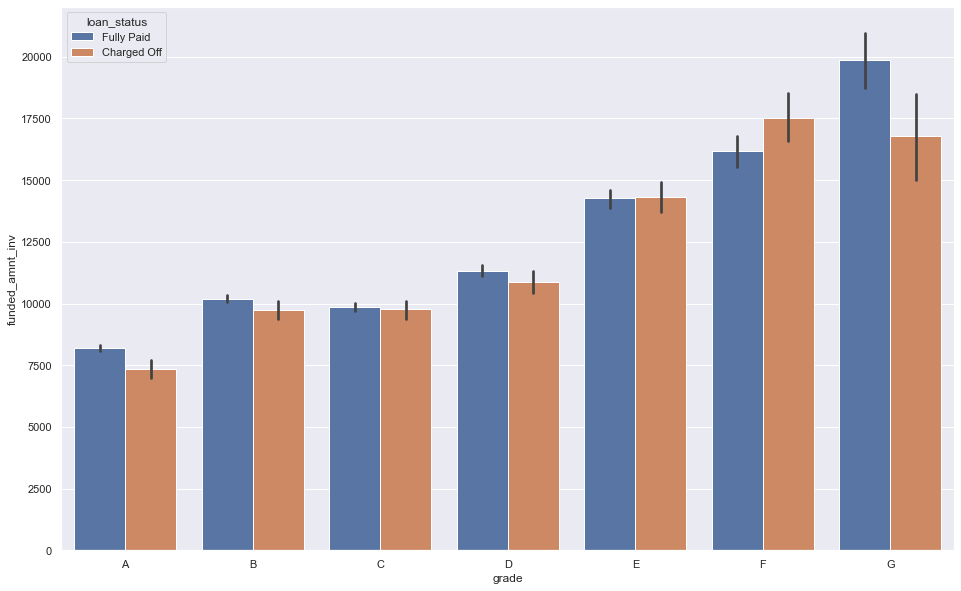

In [228]:
#Plot of grade vs investor loan amount, broken by loan status
# sub_grade/grade is an indicator of risk elevel
sns.barplot(data=loan2.sort_values('grade'),x='grade',y = 'funded_amnt_inv' ,hue='loan_status')
plt.show()

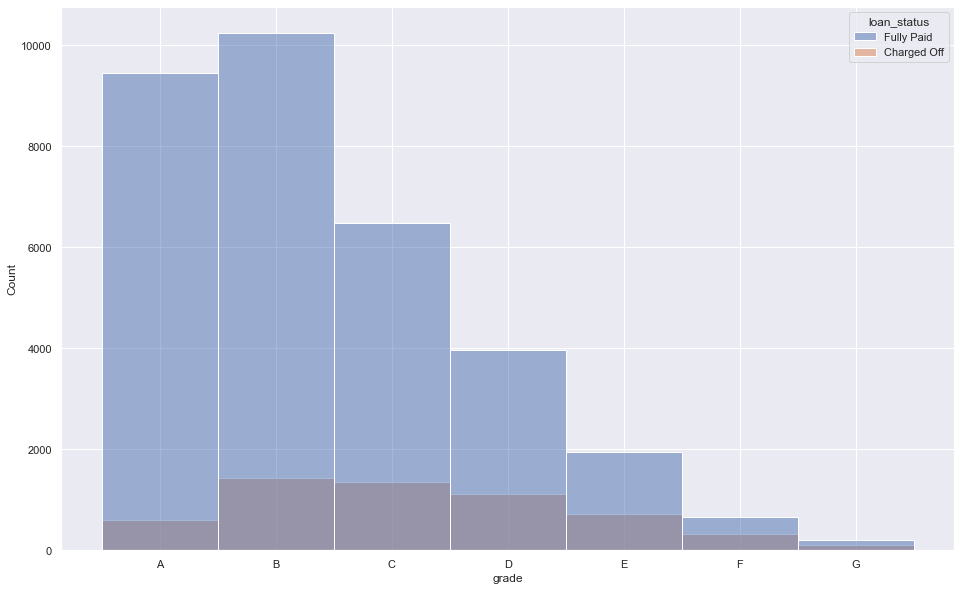

In [229]:
#Plot of grade counts by loan status
# sub_grade/grade is an indicator of risk elevel
sns.histplot(data=loan2.sort_values('grade'),x='grade',hue='loan_status')
plt.show()

#### Grade/Sub-grade analysis
#### Considering the counts the number of defaulters with grade A, B, C, D and E is significantly lower compared to number of pay-offs
#### However, the loan amount defaulted is very close loan amount paid off in B, C, D and E grades.
#### For F the defaulted amount higher than paid off amount
#### For A and G grades, the paid off amount is more than defaulted amount

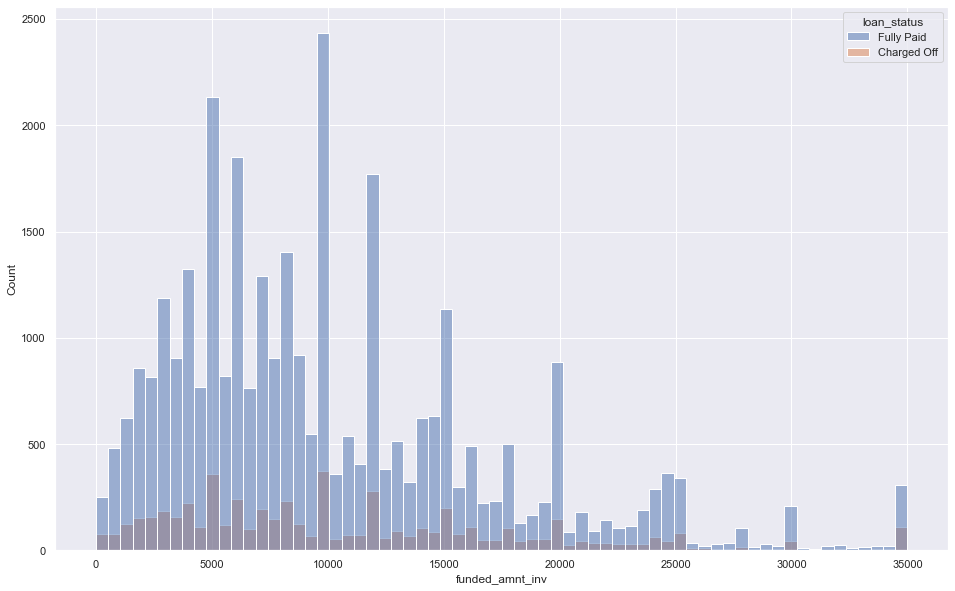

In [234]:
#Hist plot of investor loan amount counts by loan status
# sub_grade/grade is an indicator of risk elevel
sns.histplot(data=loan2.sort_values('funded_amnt_inv'),x='funded_amnt_inv',hue='loan_status')
plt.show()

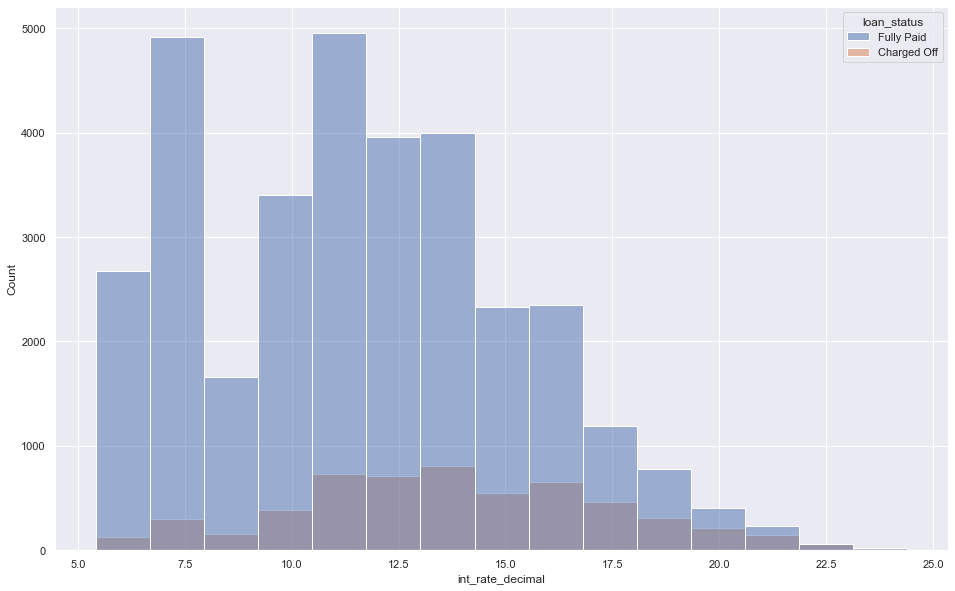

In [231]:
#Hist plot of int_rate_decimal counts by loan status
sns.histplot(data=loan2.sort_values('int_rate_decimal'),x='int_rate_decimal',hue='loan_status',bins=15)
plt.show()

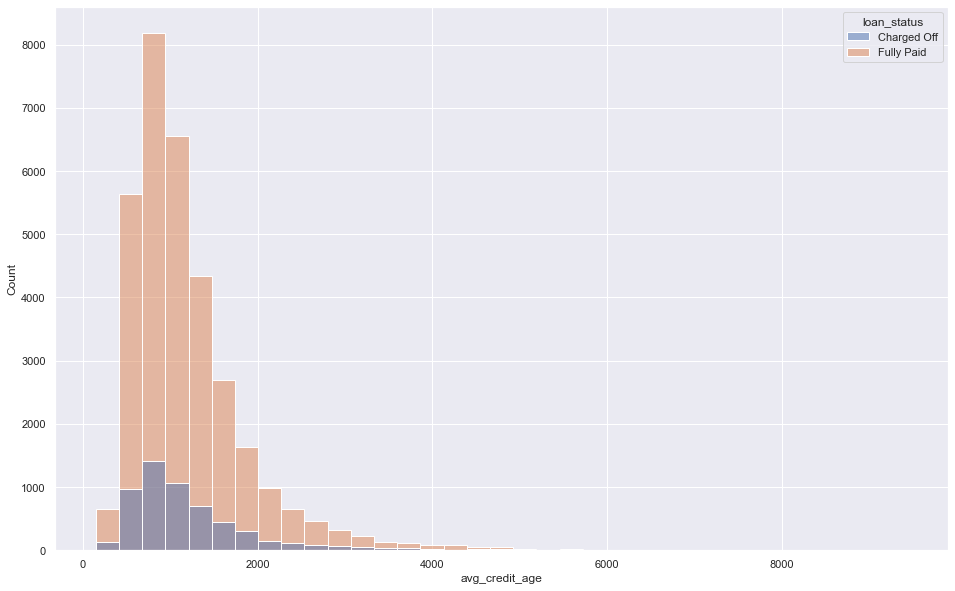

In [240]:
#Hist plot of avg_credit_age counts by loan status
sns.histplot(data=loan2.sort_values('avg_credit_age'),x='avg_credit_age',hue='loan_status',bins=35)
plt.show()

In [242]:
loan2['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [246]:
##Create a new df with rows not having NaN for emp_length
loan3 = loan2[~loan2['emp_length'].isnull()]

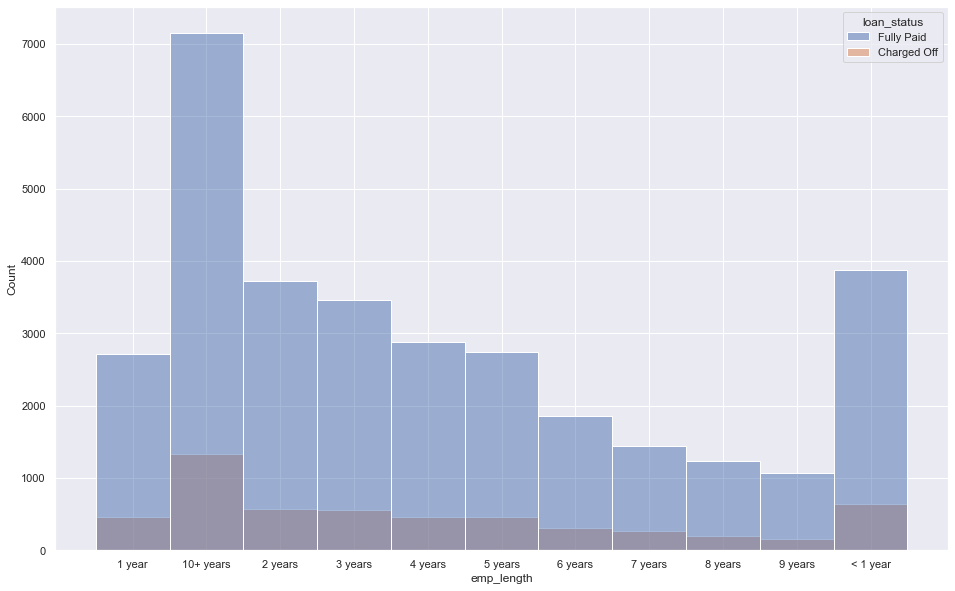

In [247]:
#Hist plot of emp_length counts by loan status
sns.histplot(data=loan3.sort_values('emp_length'),x='emp_length',hue='loan_status',bins=35)
plt.show()

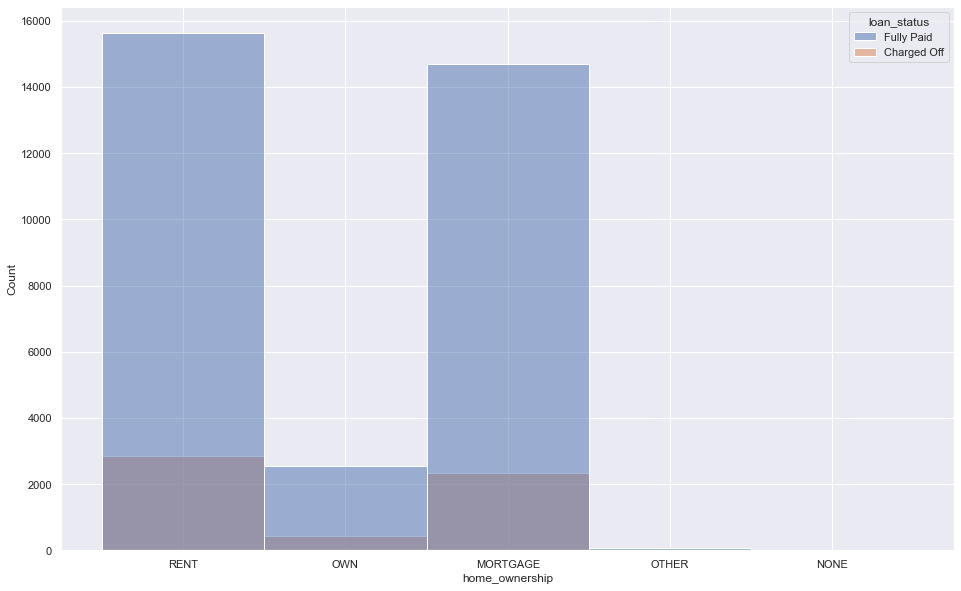

In [249]:
#Hist plot of home_ownership counts by loan status
sns.histplot(data=loan2,x='home_ownership',hue='loan_status',bins=35)
plt.show()

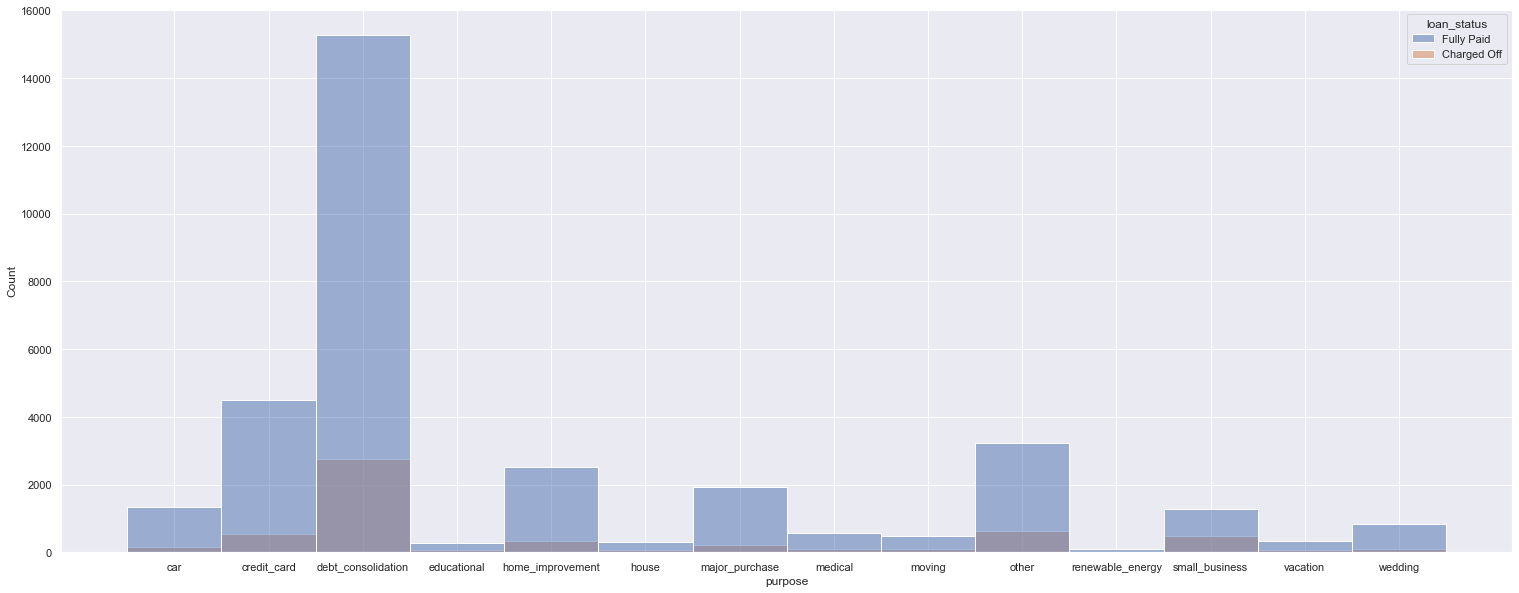

In [253]:
#Hist plot of purpose counts by loan status
sns.histplot(data=loan2.sort_values('purpose'),x='purpose',hue='loan_status',bins=35)
plt.show()

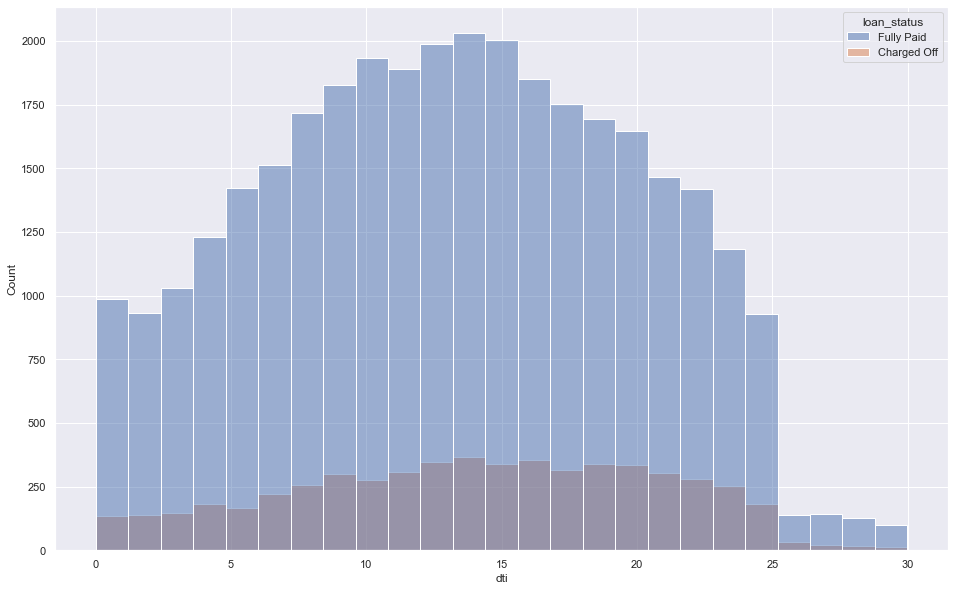

In [259]:
#Hist plot of DTI (debt to income ratio) counts by loan status
sns.histplot(data=loan2.sort_values('dti'),x='dti',hue='loan_status',bins=25)
plt.show()

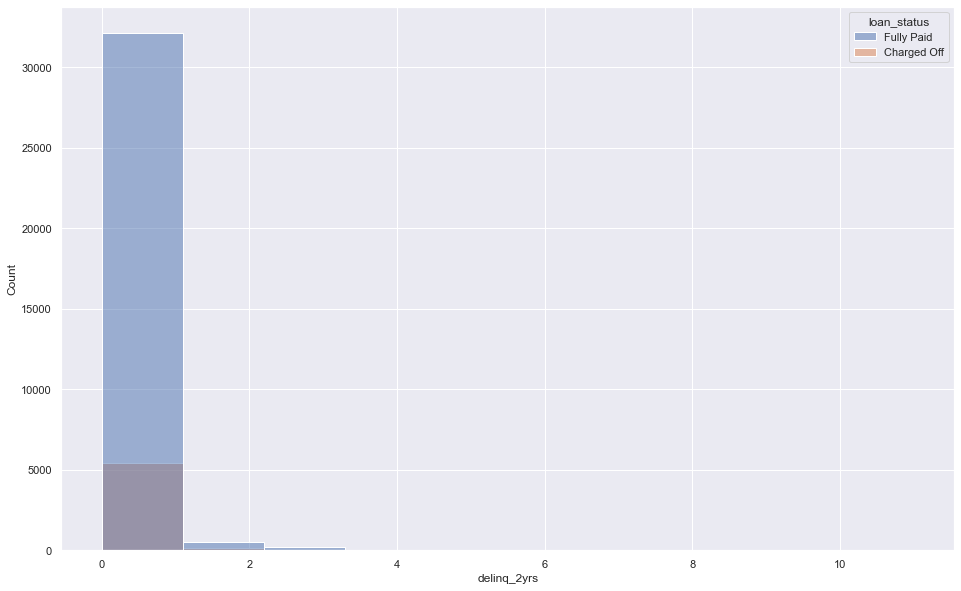

In [260]:
#delinq_2yrs
sns.histplot(data=loan2.sort_values('delinq_2yrs'),x='delinq_2yrs',hue='loan_status',bins=10)
plt.show()

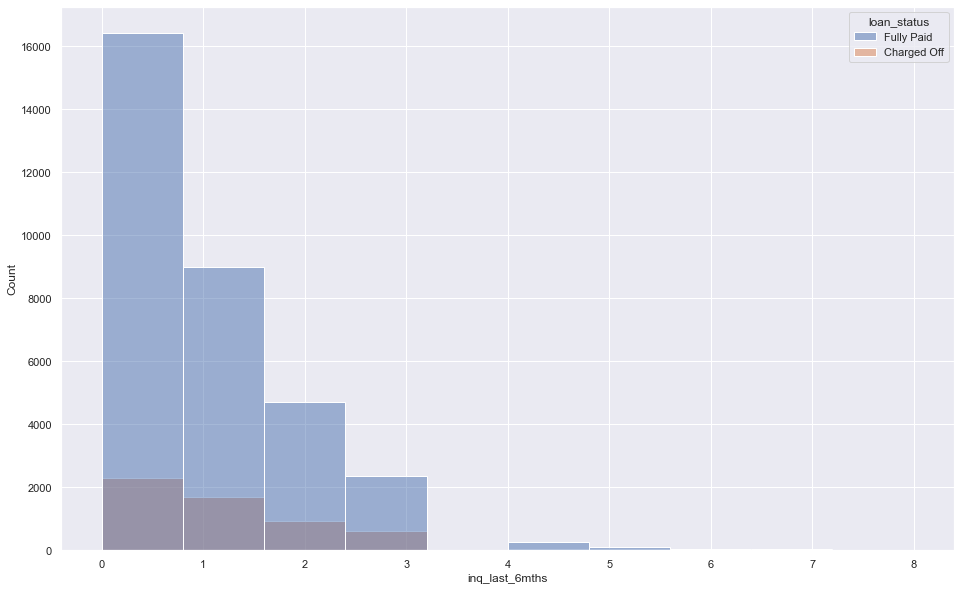

In [266]:
#inq_last_6mths
sns.histplot(data=loan2.sort_values('inq_last_6mths'),x='inq_last_6mths',hue='loan_status',bins=10)
plt.show()

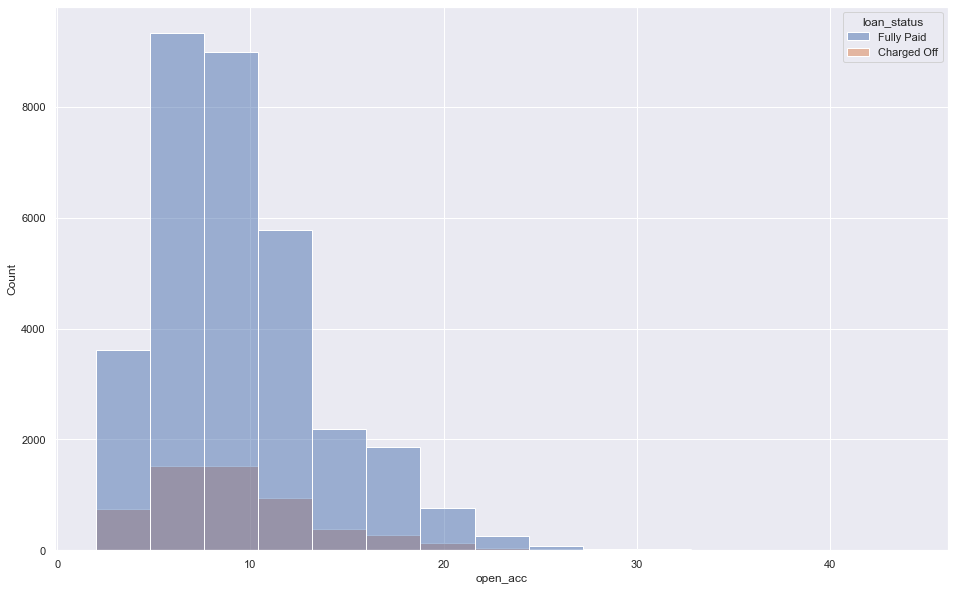

In [265]:
#open_acc
sns.histplot(data=loan2.sort_values('open_acc'),x='open_acc',hue='loan_status',bins=15)
plt.show()

In [273]:
loan2[~loan2.revol_util.isnull()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,term_months,int_rate_decimal,issue_month,issue_year,issue_quarter,loan_status_bool,earliest_cr_date,credit_age,avg_credit_age,cr_line_month,cr_line_year
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36,10.65,12,2011,4,True,1985-01-01,13371 days,4457,1,1985
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,60,15.27,12,2011,4,False,1999-04-01,8168 days,2722,4,1999
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36,15.96,12,2011,4,True,2001-11-01,7223 days,3611,11,2001
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36,13.49,12,2011,4,True,1996-02-01,9323 days,932,2,1996
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,NaN,NaN,9,0,7963,28.30%,12,f,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36,7.90,12,2011,4,True,2004-11-01,6127 days,680,11,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN,36,8.07,7,2007,3,True,1990-11-01,11241 days,864,11,1990
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07

In [275]:
loan4 = loan2[~loan2.revol_util.isnull()]

In [278]:
loan4.revol_util.value_counts()

0%        954
63%        62
0.20%      62
31.20%     57
40.70%     57
         ... 
1.88%       1
46.74%      1
10.17%      1
5.34%       1
29.53%      1
Name: revol_util, Length: 1088, dtype: int64

In [284]:
loan4.revol_util.apply(lambda x: float(str(x).split("%")[0]))

0        83.7
1         9.4
2        98.5
3        21.0
5        28.3
         ... 
39712    13.1
39713    26.9
39714    19.4
39715     0.7
39716    51.5
Name: revol_util, Length: 38527, dtype: float64

In [285]:
loan4['revol_util_pcent'] = loan4.revol_util.apply(lambda x: float(str(x).split("%")[0]))

<ipython-input-285-f12c51504b40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan4['revol_util_pcent'] = loan4.revol_util.apply(lambda x: float(str(x).split("%")[0]))


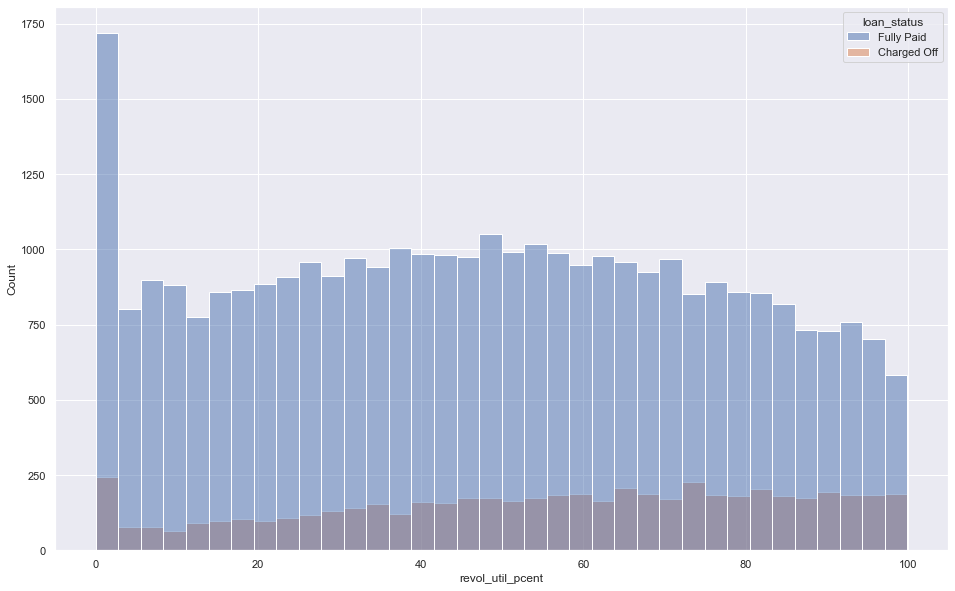

In [286]:
#revol_util
sns.histplot(data=loan4.sort_values('revol_util_pcent'),x='revol_util_pcent',hue='loan_status')
plt.show()